In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [7]:
df = pd.read_csv('weather_by_cities.csv')
df1 = pd.read_csv('Iris.csv')
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


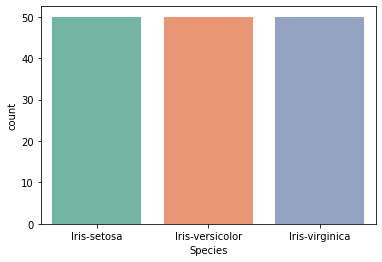

In [11]:
sb.countplot(x='Species',data=df1,palette='Set2')

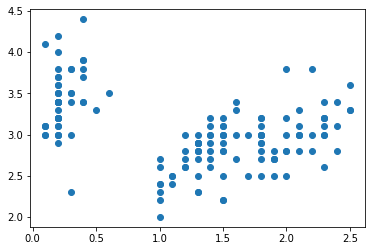

In [14]:
plt.scatter(x='PetalWidthCm',y='SepalWidthCm',data=df1)

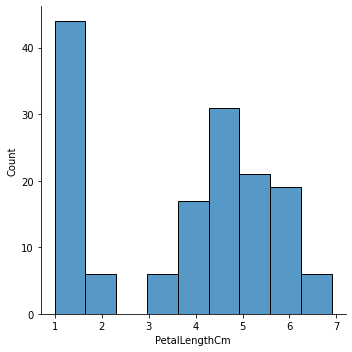

In [15]:
sb.displot(x='PetalLengthCm',data=df1)

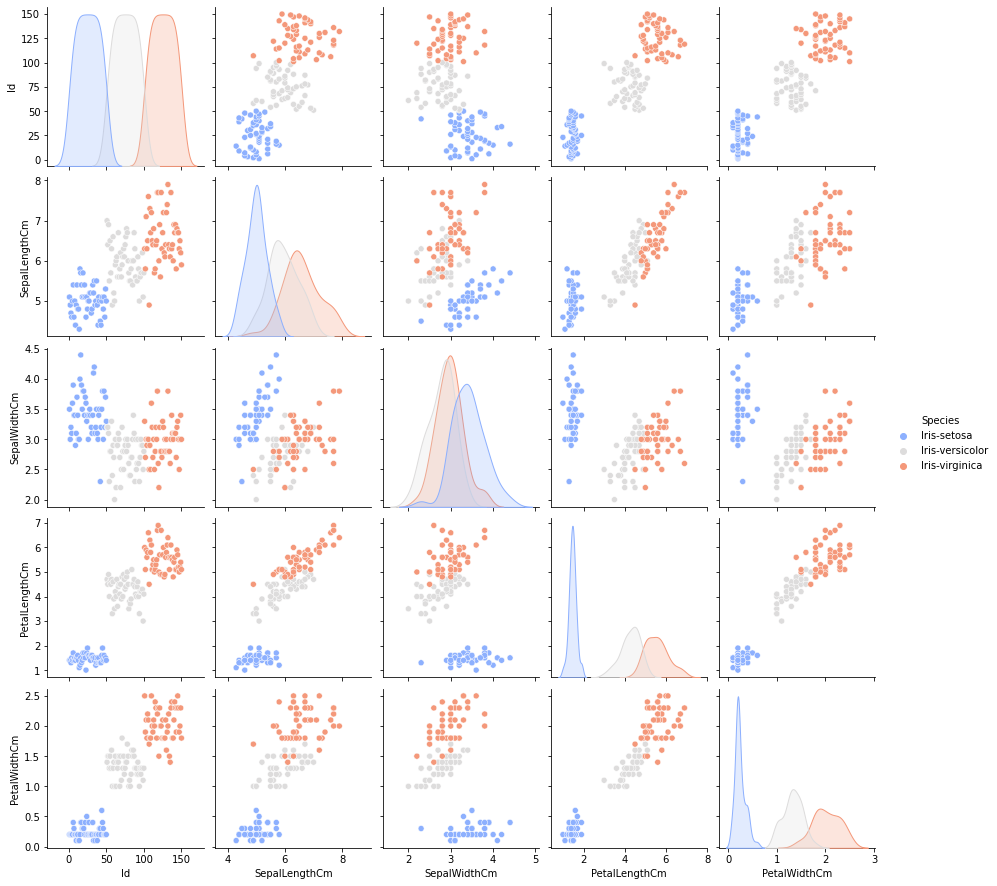

In [18]:
sb.pairplot(data=df1,hue='Species',palette='coolwarm')

**Pratical 6**

In [19]:
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


In [20]:
df.groupby('temperature')['windspeed'].mean()

temperature
28    12.0
32     6.0
33     7.0
36     7.0
42    10.0
45    20.0
50    13.0
54     8.0
85    12.0
87    15.0
90     5.0
92     5.0
Name: windspeed, dtype: float64

In [21]:
df['day'].fillna(method='ffill')

0     1/1/2017
1     1/2/2017
2     1/3/2017
3     1/4/2017
4     1/1/2017
5     1/2/2017
6     1/3/2017
7     1/4/2017
8     1/1/2017
9     1/2/2017
10    1/3/2017
11    1/4/2017
Name: day, dtype: object

In [24]:
import datetime as dt
df['day'] = pd.to_datetime(df['day']).dt.strftime('%y/%m/%d')
df['day']

0     17/01/01
1     17/01/02
2     17/01/03
3     17/01/04
4     17/01/01
5     17/01/02
6     17/01/03
7     17/01/04
8     17/01/01
9     17/01/02
10    17/01/03
11    17/01/04
Name: day, dtype: object

In [25]:
df_agg = df.groupby(['event']).agg({'temperature' : sum})
result = df_agg['temperature'].groupby(level = 0,group_keys= False)
print(result.nlargest())

event
Cloudy    146
Fog       172
Rain      124
Snow       28
Sunny     204
Name: temperature, dtype: int64


In [26]:

weather=df.groupby(['event' , pd.cut(df.windspeed,10)])
result= weather.size().unstack()
print(result)

windspeed  (4.985, 6.5]  (6.5, 8.0]  (8.0, 9.5]  (9.5, 11.0]  (11.0, 12.5]  \
event                                                                        
Cloudy                0           1           0            1             0   
Fog                   0           0           0            0             1   
Rain                  2           0           0            0             0   
Snow                  0           0           0            0             1   
Sunny                 1           2           0            0             0   

windspeed  (12.5, 14.0]  (14.0, 15.5]  (15.5, 17.0]  (17.0, 18.5]  \
event                                                               
Cloudy                1             0             0             0   
Fog                   0             1             0             0   
Rain                  0             0             0             0   
Snow                  0             0             0             0   
Sunny                 0             0  